(1000, 2)


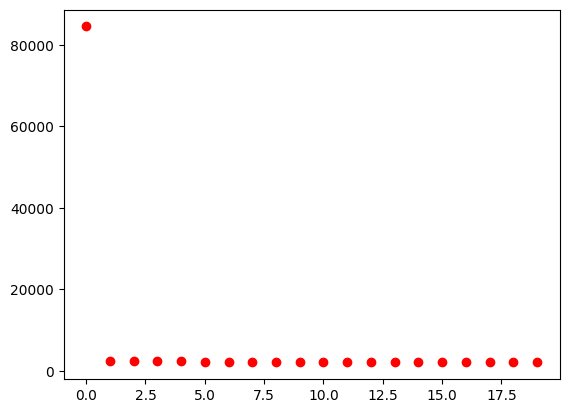

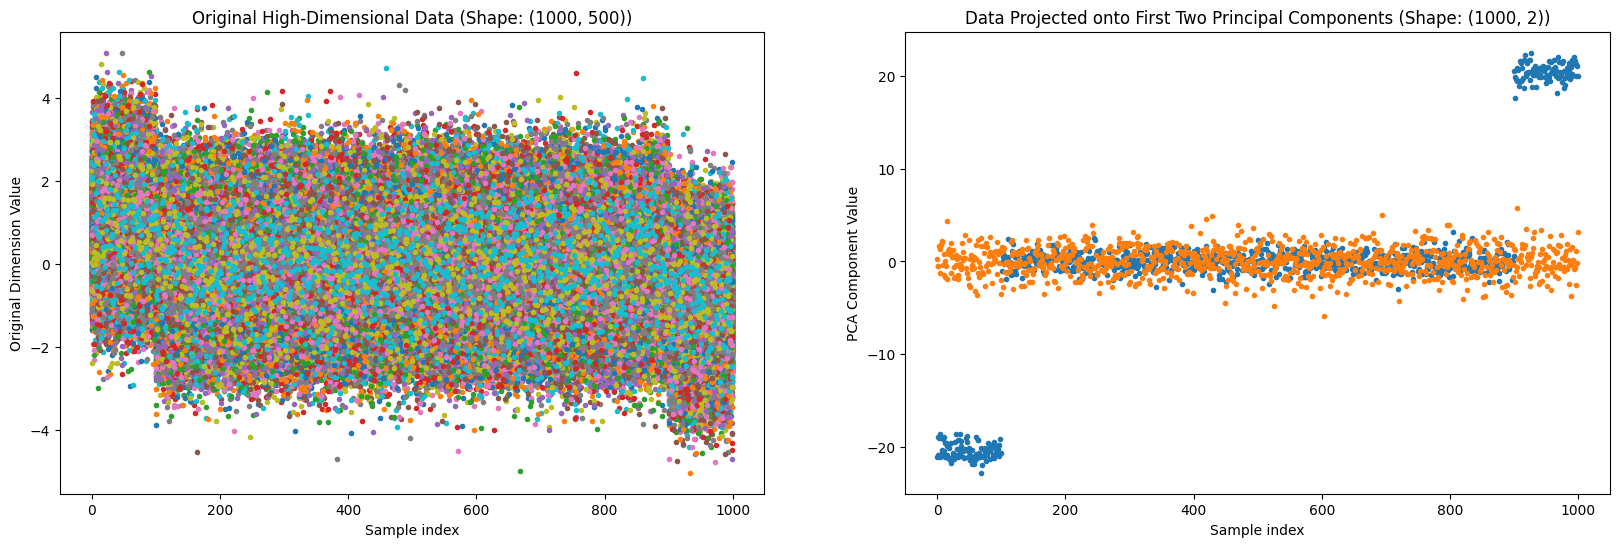

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
from sklearn.preprocessing import StandardScaler

m=1000 # No. of samples
n=500 # No. of features
X=randn(m,n)

# Creating random numbers with differences to create 3 clusters.
X[:100,:]=X[:100,:]+1
X[:400,:]=X[:400,:]
X[-100:,:]=X[-100:,:]-1

# Applying Z-score to convert
X_std=(X-np.mean(X))/np.std(X)

# Calculate the covariance matrix (M x M)
covX = np.dot(X_std.T, X_std)

# Eigenvalues and eigenvectors
eig_values, eigen_vectors = np.linalg.eig(covX)

# Define desirable principal components
p = 2

# Project the data onto the first 'p' columns of eigen_vectors
X_PCA = np.dot(X_std, eigen_vectors[:, :p])

print(X_PCA.shape)
plt.plot(eig_values[:20],'or')
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.xlabel("Sample index")
plt.ylabel("Original Dimension Value")
plt.title(f"Original High-Dimensional Data (Shape: {X.shape})")
plt.plot(X,'.')
plt.subplot(1,2,2)
plt.xlabel("Sample index")
plt.ylabel("PCA Component Value")
plt.title(f"Data Projected onto First Two Principal Components (Shape: {X_PCA.shape})")
plt.plot(X_PCA,'.')
plt.show()

im1 is now matrix, i.e. <class 'numpy.ndarray'> (407, 594)


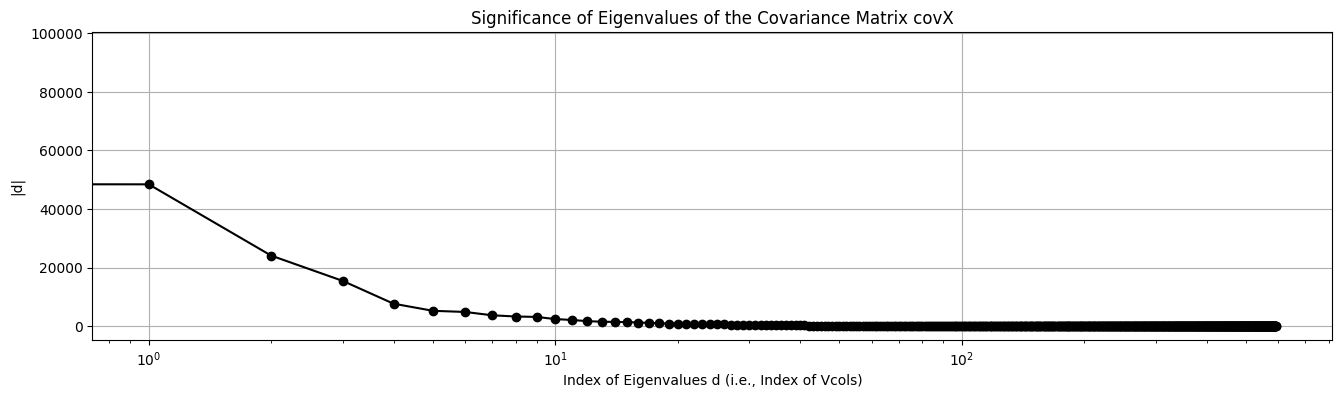

X ... N x M = (407, 594)
choosing m= 10
Xcols ... N x m = (407, 10)


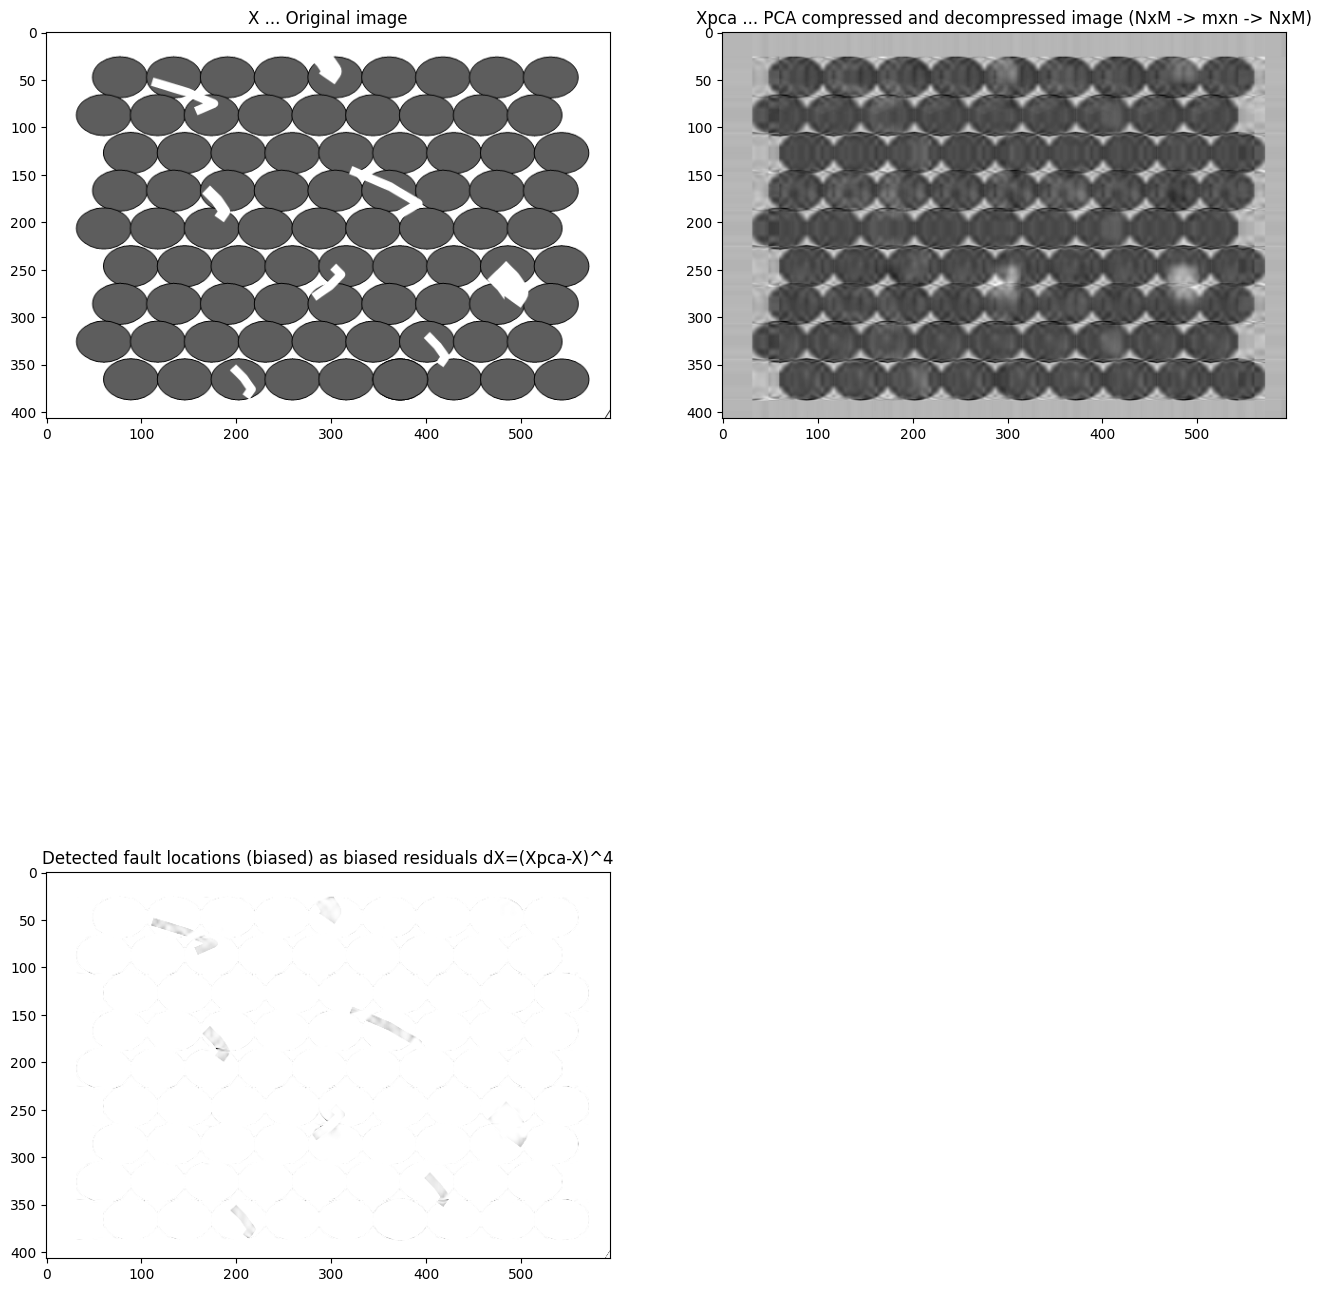

In [96]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt

img1 = "/content/regular_patttern_with_perturb.png"
im1 = pil.Image.open(img1)

im1=np.mean(im1,2)  # gray img, 2-D matrix,...X

print("im1 is now matrix, i.e.", type(im1), im1.shape)
X = im1.copy()
X = (X - np.mean(X)) / np.std(X)

covX = np.dot(X.T, X)  # Covariance matrix (M x M)

d, Vcols = np.linalg.eig(covX)  # Eigenvalues and eigenvectors

plt.figure(figsize=(16, 4))
plt.title("Significance of Eigenvalues of the Covariance Matrix covX")
plt.semilogx(abs(d), '-ok')
plt.ylabel('|d|')
plt.xlabel('Index of Eigenvalues d (i.e., Index of Vcols)')
plt.grid()
plt.show()

print("X ... N x M =",X.shape)
m=10
print("choosing m=",m)

### Compressing the image from shape (407, 594) to shape (407, 10)
Xcompressed=np.dot(X,Vcols[:,:m])
print("Xcols ... N x m =",Xcompressed.shape)

### Decompression - retaining only correlated events (the degree of correlation depends on the choice of m and n)
Xpca = np.dot(Xcompressed, Vcols[:, :m].T)

Xpca = np.real(Xpca)

plt.figure(figsize=(16, 20))
plt.subplot(221)
plt.imshow(X, cmap='gray')
plt.title("X ... Original image")
plt.subplot(222)
plt.imshow(Xpca, cmap='gray')
plt.title("Xpca ... PCA compressed and decompressed image (NxM -> mxn -> NxM)")
plt.subplot(223)
dX = (Xpca - X) ** 4  # Thresholding (enhancing the difference between white and black), using powers of 2, 4, 6, 8
plt.imshow(-dX, cmap='gray')
plt.title("Detected fault locations (biased) as biased residuals dX=(Xpca-X)^4")
plt.show()